Import libraries

In [ ]:
import pandas as pd

Load dataset

In [2]:
df = pd.read_csv('../data/processed/final_ml_dataset.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,support_calls,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,2,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,2,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2,1


Inspect data

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   str    
 1   gender             7043 non-null   str    
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   str    
 4   dependents         7043 non-null   str    
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   str    
 7   multiple_lines     7043 non-null   str    
 8   internet_service   7043 non-null   str    
 9   online_security    7043 non-null   str    
 10  online_backup      7043 non-null   str    
 11  device_protection  7043 non-null   str    
 12  tech_support       7043 non-null   str    
 13  streaming_tv       7043 non-null   str    
 14  streaming_movies   7043 non-null   str    
 15  contract           7043 non-null   str    
 16  paperless_billing  7043 non-null   

In [4]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges,support_calls,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,1.286668,0.265370
std,0.368612,24.559481,30.090047,2265.270398,1.370678,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,2.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,1.000000


No: of Rows & Coulumns

In [5]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 7043
Columns: 22


Get the unique values in eact columns

In [6]:
for i in df.columns:
    print(i, df[i].unique())
    print('*' * 20)

customer_id <StringArray>
['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
 '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
 ...
 '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
 '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043, dtype: str
********************
gender <StringArray>
['Female', 'Male']
Length: 2, dtype: str
********************
senior_citizen [0 1]
********************
partner <StringArray>
['Yes', 'No']
Length: 2, dtype: str
********************
dependents <StringArray>
['No', 'Yes']
Length: 2, dtype: str
********************
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
********************
phone_service <StringArray>
['No', 'Yes']
Length: 2, dtype: str
********************
multiple_lines <

Understand the Target Variable

In [7]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

Check imbalance

In [8]:
df['churn'].value_counts(normalize = True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Feature columns

In [9]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'support_calls',
       'churn'],
      dtype='str')

Separate categorical & numerical columns

In [10]:
categorical_cols = [
    'gender', 'partner', 'dependents',
    'phone_service', 'multiple_lines',
    'internet_service', 'online_security',
    'online_backup', 'device_protection',
    'tech_support', 'streaming_tv',
    'streaming_movies', 'contract',
    'paperless_billing', 'payment_method'
]

numeric_cols = [
    'senior_citizen',
    'tenure',
    'monthly_charges',
    'total_charges',
    'support_calls'
]

Separate features & targets

In [11]:
X = df[categorical_cols + numeric_cols]
y = df['churn']

Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = .2,
    random_state = 42,
    stratify = y
)

Create preprocessing pipeline

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols), 
        ('num', StandardScaler(), numeric_cols)
]
)

Fit preprocessor on training data

In [14]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Handle class imbalance

In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train),
    y = y_train
)

class_weights_dict = dict(zip(np.unique(y_train), class_weights))

Save preprocessor

In [16]:
import joblib
joblib.dump(preprocessor, "../models/preprocessor.pkl")

['../models/preprocessor.pkl']

Compare models for training

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

In [18]:
results = []

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    probs = model.predict_proba(X_test_processed)[:, 1]
    auc = roc_auc_score(y_test, probs)
    results.append([name, auc])

df_results = pd.DataFrame(results, columns=["Model", "ROC-AUC"])
df_results.sort_values(by="ROC-AUC", ascending=False, inplace=True)
df_results

,Model,ROC-AUC
3,Gradient Boosting,0.845197
0,Logistic Regression,0.839514
2,Random Forest,0.826317
6,XGBoost,0.820063
5,SVC,0.783961
4,KNN,0.781711
1,Decision Tree,0.662575


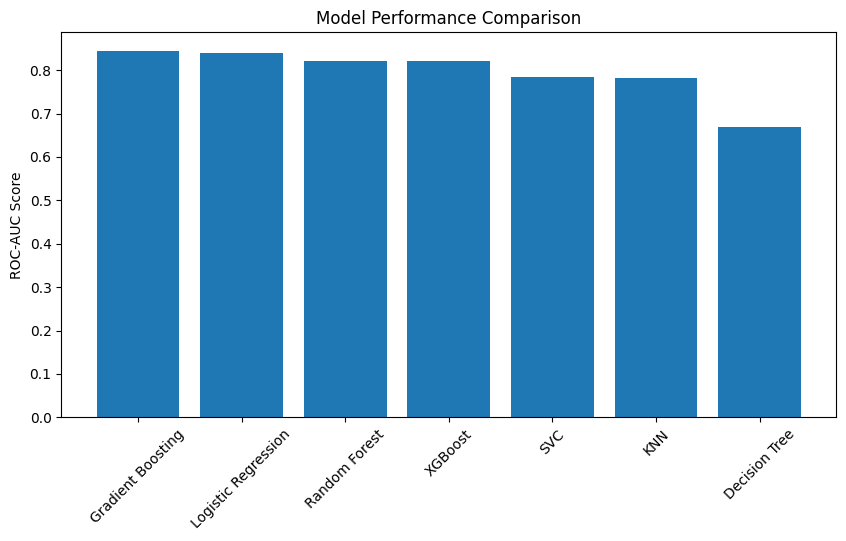

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_results["Model"], df_results["ROC-AUC"])
plt.xticks(rotation=45)
plt.ylabel("ROC-AUC Score")
plt.title("Model Performance Comparison")
plt.show()